In [1]:
import pandas as pd

In [2]:
df_letters = pd.read_csv('all_lettters_with_entities_final.tsv',sep='\t')

In [3]:
df_manual = pd.read_excel('Network_from_Carlotta/Correspondence_analysis.xlsx',sep='\t').dropna(subset=['Sender (From)','Addressee (To)'])
filenames_manual = set(df_manual['File name'].tolist())

In [4]:
df_graph = pd.read_csv('df_graph_with_wikidata.tsv',sep='\t')


In [5]:
df_letters['is_seen_in_manual'] = df_letters['filename'].map(lambda x: x in filenames_manual)
df_letters_interesting = df_letters[df_letters['is_seen_in_manual']]
df_letters_interesting

,part_of.title,images.reference,filename,is_missing,path_to_image,page_type,path_to_text,path_to_handwritten_info,people,handwritten_info,people_split,is_seen_in_manual
744,Correspondence with the Victoria & Albert Muse...,..\images\jpg\922\0001248922.jpg,1248922.0,False,/ivi/ilps/projects/ArtDATIS/valkema/MMRKD07_00...,typed,/ivi/ilps/projects/ArtDATIS/artdatis/tagging/O...,NaN,"{'Ann', 'J.V.G.Mall', 'arff', 'Durk', 'Gary Be...",NaN,"{'Victoria and', 'J.V.G.Mallet', 'Durk', 'arff...",True
745,Correspondence with the Victoria & Albert Muse...,..\images\jpg\924\0001248924.jpg,1248924.0,False,/ivi/ilps/projects/ArtDATIS/valkema/MMRKD07_00...,typed,/ivi/ilps/projects/ArtDATIS/artdatis/tagging/O...,NaN,"{'Vic', 'Victoria and Albert', 'Albert Museum'}",NaN,"{'Albert Museum', 'Victoria and', 'Albert', 'V...",True
746,Correspondence with the Victoria & Albert Muse...,..\images\jpg\942\0001248942.jpg,1248942.0,False,/ivi/ilps/projects/ArtDATIS/valkema/MMRKD07_00...,typed,/ivi/ilps/projects/ArtDATIS/artdatis/tagging/O...,NaN,"{'V.G.Mali t', 'Bla', 'Wilke', 'John Mallet', ...",NaN,"{'Wilke', 'G.Maliet', 'Wilke adolfsson', 'Yvon...",True
750,Correspondence with the Victoria & Albert Muse...,..\images\jpg\952\0001248952.jpg,1248952.0,False,/ivi/ilps/projects/ArtDATIS/valkema/MMRKD07_00...,typed,/ivi/ilps/projects/ArtDATIS/artdatis/tagging/O...,NaN,"{'Mallet', 'J.V.G.Mallet', 'Mall', 'J.V.G.Mall...",NaN,"{'Mall', 'J.V.G.Malle', 'Victoria and', 'J.V.G...",True
753,Correspondence with the Victoria & Albert Muse...,..\images\jpg\956\0001248956.jpg,1248956.0,False,/ivi/ilps/projects/ArtDATIS/valkema/MMRKD07_00...,typed,/ivi/ilps/projects/ArtDATIS/artdatis/tagging/O...,NaN,"{'Vic', 'Victoria and Albert', 'Albert Museum'}",NaN,"{'Albert Museum', 'Victoria and', 'Albert', 'V...",True
...,...,...,...,...,...,...,...,...,...,...,...,...
5674,Correspondence with Kunstmuseum DÃ¼sseldorf,..\images\jpg\188\0001461188.jpg,1461188.0,False,/ivi/ilps/personal/vprovat/missing_folders_Art...,likely handwritten,/ivi/ilps/personal/vprovat/Valkema_HTR_results...,/ivi/ilps/personal/vprovat/backup_ocr/handwrit...,"{'Sybren Valke', 'Blaricum Holland', 'Nicola a...",Page number: 0\nOrientation in degrees: 180\nR...,"{'Blaricum Holland', 'Floris Meydam', 'Roberto...",True
5692,Correspondence with Takako Sano,..\images\jpg\399\0001468399.jpg,1468399.0,False,/ivi/ilps/personal/vprovat/missing_folders_Art...,likely handwritten,/ivi/ilps/personal/vprovat/Valkema_HTR_results...,/ivi/ilps/personal/vprovat/backup_ocr/handwrit...,"{'J. Ualkem', 'Ni', 'Takako Sand', 'J. Ualkema...",Page number: 0\nOrientation in degrees: 180\nR...,"{'Takalso Saml', 'J. Ualkem', '"" Ottow', 'Taka...",True
5795,Letter to the former student Lies Cosijn,..\images\jpg\030\0001318030.jpg,1318030.0,False,/ivi/ilps/projects/ArtDATIS/valkema/MMRKD07_00...,likely handwritten,/ivi/ilps/personal/vprovat/Valkema_HTR_results...,/ivi/ilps/personal/vprovat/backup_ocr/new_resu...,set(),None,set(),True
5796,Letter to the former student Lies Cosijn,..\images\jpg\031\0001318031.jpg,1318031.0,False,/ivi/ilps/projects/ArtDATIS/valkema/MMRKD07_00...,likely handwritten,/ivi/ilps/personal/vprovat/Valkema_HTR_results...,/ivi/ilps/personal/vprovat/backup_ocr/new_resu...,"{'C. Celle', 'Coronel', 'Dr', 'Col', 'J p', 'C...",None,"{'C. Cell', 'J.p. Colpa', 'C. Celle', 'Th. Lim...",True


In [6]:
import json
# alias = json.load(open('alias_dictionary_corrected.jsonl','r'))
aka = json.load(open('also_known_as_final.json','r'))

alias = {}
for main_name, names in aka.items():
    for name in names:
        alias[name] = main_name
        
def resolve_alias(p):
    cnt = 0
    while p in alias and cnt < 10:
        p = alias[p]
        cnt += 1
    if cnt == 10:
        print('Got a loop in aliases! Starting point: ',p)
    return p


In [7]:
people_with_wikidata = set(df_graph['person1'].tolist()+df_graph['person2'].tolist())

In [8]:
df_letters_interesting['people'] = df_letters_interesting['people_split'].map(lambda x: set([resolve_alias(person) for person in eval(x)
                                                                        if resolve_alias(person) in people_with_wikidata]))

/home/vprovat/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [16]:
df_letters_interesting['has_people'] = df_letters_interesting['people'].map(lambda x: len(x)>1)
df_letters_interesting = df_letters_interesting[df_letters_interesting['has_people']].reset_index()
df_letters_interesting['filename'] = df_letters_interesting['filename'].astype(int)
df_letters_interesting.head()

,level_0,index,part_of.title,images.reference,filename,is_missing,path_to_image,page_type,path_to_text,path_to_handwritten_info,people,handwritten_info,people_split,is_seen_in_manual,has_people
0,0,744,Correspondence with the Victoria & Albert Muse...,..\images\jpg\922\0001248922.jpg,1248922,False,/ivi/ilps/projects/ArtDATIS/valkema/MMRKD07_00...,typed,/ivi/ilps/projects/ArtDATIS/artdatis/tagging/O...,NaN,"{Durk Valkema, Sybren Valkema, Gary Beecham, W...",NaN,"{'Victoria and', 'J.V.G.Mallet', 'Durk', 'arff...",True,True
1,1,746,Correspondence with the Victoria & Albert Muse...,..\images\jpg\942\0001248942.jpg,1248942,False,/ivi/ilps/projects/ArtDATIS/valkema/MMRKD07_00...,typed,/ivi/ilps/projects/ArtDATIS/artdatis/tagging/O...,NaN,"{Yvonne Brunhammer, Wilke Adolfsson}",NaN,"{'Wilke', 'G.Maliet', 'Wilke adolfsson', 'Yvon...",True,True
2,2,756,"Correspondence with Jon Andersson, West Surrey...",..\images\jpg\960\0001248960.jpg,1248960,False,/ivi/ilps/projects/ArtDATIS/valkema/MMRKD07_00...,typed,/ivi/ilps/projects/ArtDATIS/artdatis/tagging/O...,NaN,"{Carla Koch, Mieke Groot, Richard Meitner, Joh...",NaN,"{'Engle d Bla', 'Jon Sounds', 'Fred Roeske', '...",True,True
3,3,757,"Correspondence with Jon Andersson, West Surrey...",..\images\jpg\964\0001248964.jpg,1248964,False,/ivi/ilps/projects/ArtDATIS/valkema/MMRKD07_00...,typed,/ivi/ilps/projects/ArtDATIS/artdatis/tagging/O...,NaN,"{Sybren Valkema, John Anderson, Gerrit Rietveld}",NaN,"{'Gerrit Rietveld', 'Syben Valkema', 'Jon Ande...",True,True
4,4,826,Correspondence with 'Instituut voor Industriel...,..\images\jpg\393\0001258393.jpg,1258393,False,/ivi/ilps/projects/ArtDATIS/valkema/MMRKD07_00...,typed,/ivi/ilps/projects/ArtDATIS/artdatis/tagging/O...,NaN,"{Gerrit Rietveld, Sybren Valkema, Frits Grambe...",NaN,"{'W. R', 'Arch. G. Rietveld', 'R. Smeets', 'Cr...",True,True


In [18]:
wikidata_id_per_name = dict(zip(df_graph['person1'].tolist()+df_graph['person2'].tolist(), 
                                df_graph['wikidata_id1'].tolist()+df_graph['wikidata_id2'].tolist()
                               ))

wikidata_description_per_name = dict(zip(df_graph['person1'].tolist()+df_graph['person2'].tolist(), 
                                df_graph['wikidata_description1'].tolist()+df_graph['wikidata_description2'].tolist()
                               ))

In [19]:
records = []

for _, row in df_letters_interesting.iterrows():
    people = list(row['people'])
    for i, per1 in enumerate(people[:-1]):
        for per2 in people[i+1:]:
            records.append({'person1': per1,
                           'person2': per2,
                           'filename': row['filename'],
                           'wikidata_id1':wikidata_id_per_name[per1],
                           'wikidata_description1':wikidata_description_per_name[per1],
                           'wikidata_id2':wikidata_id_per_name[per2],
                           'wikidata_description2':wikidata_description_per_name[per2]})

In [20]:
df_graph_manual = pd.read_csv('/ivi/ilps/personal/vprovat/valkema_graph_directed_manual.tsv',sep='\t')
seen_connections = set([(row['person1'],row['person2'])
                       for _,row in df_graph_manual.iterrows()])

In [21]:
df_graph_to_evaluate = pd.DataFrame.from_records(records)
df_graph_to_evaluate['is_new'] = df_graph_to_evaluate.apply(lambda x:
                                                           (x.person1, x.person2) not in seen_connections
                                                           and (x.person2, x.person1) not in seen_connections,
                                                           axis=1)

In [22]:
df_graph_to_evaluate=df_graph_to_evaluate[df_graph_to_evaluate['is_new']].drop('is_new',axis=1)
df_graph_to_evaluate

,person1,person2,filename,wikidata_id1,wikidata_description1,wikidata_id2,wikidata_description2
1,Durk Valkema,Gary Beecham,1248922,Q29422094,Dutch sculptor,Q5524683,American artist
2,Durk Valkema,Wilke Adolfsson,1248922,Q29422094,Dutch sculptor,Q5543008,Swedish artist
3,Durk Valkema,Harvey Littleton,1248922,Q29422094,Dutch sculptor,Q15488059,"Artist, educator"
4,Sybren Valkema,Gary Beecham,1248922,Q2618110,Dutch glass artist (1916-1996),Q5524683,American artist
5,Sybren Valkema,Wilke Adolfsson,1248922,Q2618110,Dutch glass artist (1916-1996),Q5543008,Swedish artist
...,...,...,...,...,...,...,...
607,Sybren Valkema,Richard Meitner,1461188,Q2618110,Dutch glass artist (1916-1996),Q22236132,Description not found.
608,Sybren Valkema,Floris Meydam,1461188,Q2618110,Dutch glass artist (1916-1996),Q2312612,Description not found.
609,Mieke Groot,Richard Meitner,1461188,Q96756232,Dutch glass artist,Q22236132,Description not found.
610,Mieke Groot,Floris Meydam,1461188,Q96756232,Dutch glass artist,Q2312612,Description not found.


In [29]:
df_for_evaluation = df_graph_to_evaluate.sample(n=25,random_state=42)

In [33]:
df_for_evaluation['wikidata_id1']=df_for_evaluation['wikidata_id1'].map(lambda x: 'https://www.wikidata.org/wiki/'+x)
df_for_evaluation['wikidata_id2']=df_for_evaluation['wikidata_id2'].map(lambda x: 'https://www.wikidata.org/wiki/'+x)

In [6]:
# sanity check
from PIL import Image
def show_image(filename):
    df_target = df_letters[df_letters['filename'] == filename]
    img_path_big = df_target.iloc[0]['path_to_image']
    img_path = img_path_big.replace('TIF','JPG').replace('tif','jpg')
    print(img_path)
    try:
        img = Image.open(img_path)
    except:
        img = Image.open(img_path_big)
    display(img)
#     print(img_path_big)

/ivi/ilps/projects/ArtDATIS/valkema/MMRKD07_000000011_1_01/Afgeleiden/JPG/235/0001269442.jpg


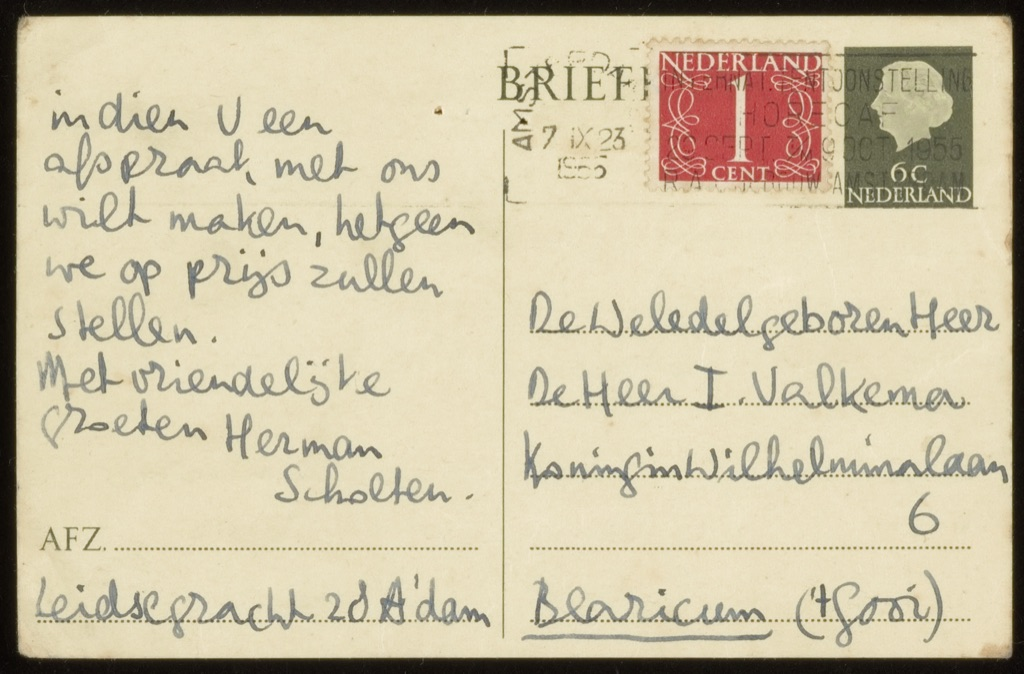

In [32]:
show_image(1269442)

/ivi/ilps/projects/ArtDATIS/valkema/MMRKD07_000000010_1_01/Afgeleiden/JPG/120/0001258393.jpg


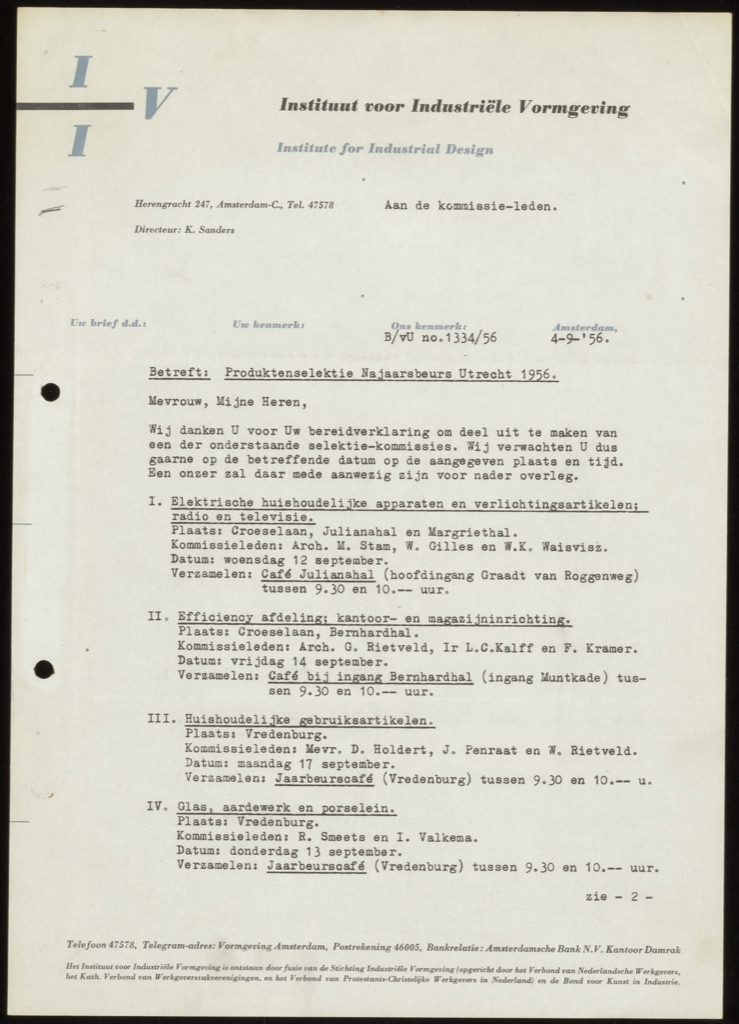

In [9]:
show_image(1258393)

In [10]:
df_for_evaluation

NameError: name 'df_for_evaluation' is not defined

In [ ]:
df_for_evaluation.to_csv('sample_for_manual_evaluation_FINAL.tsv',sep='\t',index=False)